In [1]:
pip install seaborn 


     |████████████████████████████████| 283 kB 3.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install six

Note: you may need to restart the kernel to use updated packages.


Importing libraries 

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv",delimiter=",")

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [35]:
df.shape

(520, 17)

In [36]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [37]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [38]:
df["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

<AxesSubplot:>

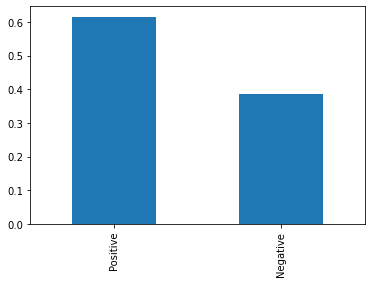

In [39]:
df["class"].value_counts(normalize=True).plot.bar()

More than 60 percent of the data points involves individuals who are newly diabetic or would be a diabetic patient. 

Lets perform univariate analysis to understand other variables in the dataset. Here we are considering the following categorical variables: Gender, Sudden Weight loss, Obesity and Visual Blurring. 

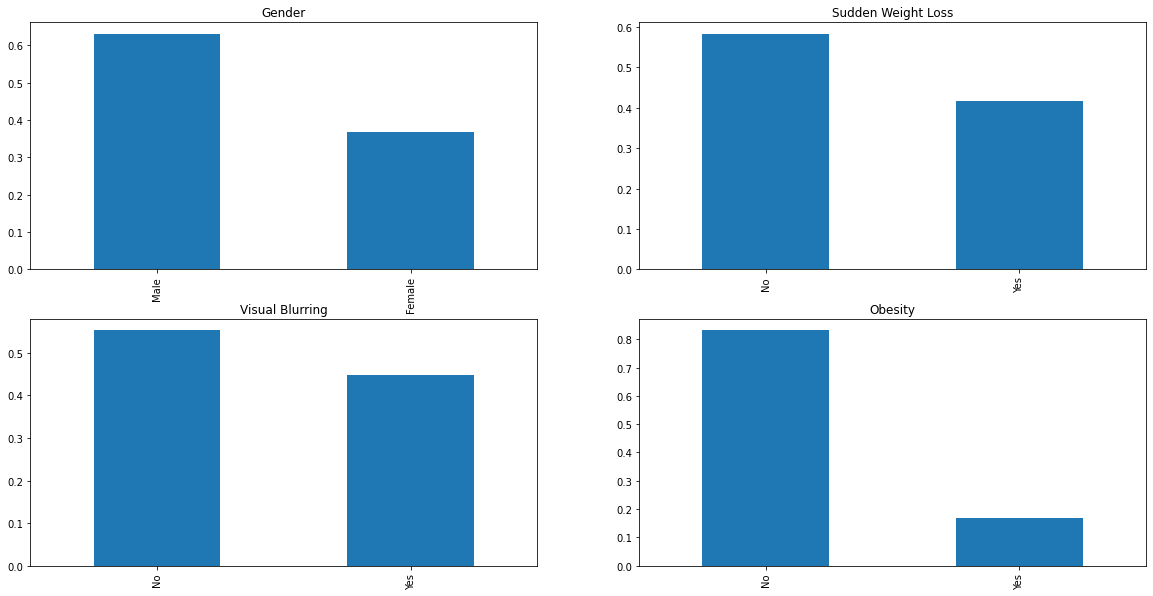

In [40]:
plt.figure(1)
plt.subplot(221)
df["Gender"].value_counts(normalize = True).plot.bar(figsize = (20,10), title= "Gender")
plt.subplot(222)
df["sudden weight loss"].value_counts(normalize = True).plot.bar(figsize = (20,10), title= "Sudden Weight Loss")
plt.subplot(223)
df["visual blurring"].value_counts(normalize = True).plot.bar(figsize = (20,10), title= "Visual Blurring")
plt.subplot(224)
df["Obesity"].value_counts(normalize = True).plot.bar(figsize = (20,10), title= "Obesity")
plt.show()

From the analysis we can infer the following: 
1. More than 60% of the individuals in the dataset are Males 
2. The percentage of "No" in the categorical variables like Sudden Weight loss, Visual Blurring, Obesity is higher than the percentage of "Yes". 

Now lets perform the analysis for Numerical variable - Age


<function matplotlib.pyplot.show(close=None, block=None)>

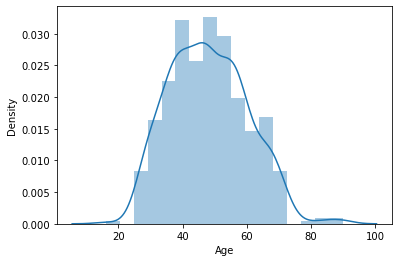

In [41]:
plt.figure()
sns.distplot(df["Age"])
plt.show

The numerical variable "Age" has a normal distribution which is helpful for model development. 

Now lets perform  a bivariate analysis to understand the relation between different variables and Class. 


In [42]:
Gender = pd.crosstab(df["Gender"], df["class"])
Gender

class,Negative,Positive
Gender,,
Female,19,173
Male,181,147


<AxesSubplot:xlabel='Gender'>

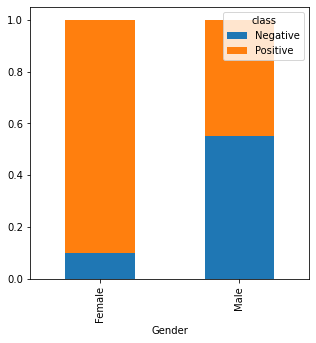

In [43]:
Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True, figsize = (5,5))


From the above figure, we can say that more Females are positive when compared to Males. 

In [44]:
Weightloss = pd.crosstab(df["sudden weight loss"], df["class"])
Weightloss

class,Negative,Positive
sudden weight loss,,
No,171,132
Yes,29,188


<AxesSubplot:xlabel='sudden weight loss'>

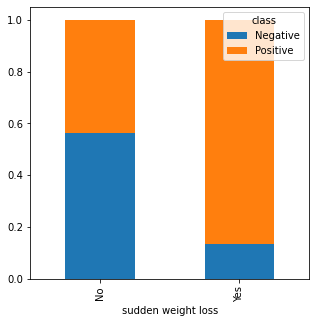

In [45]:
Weightloss.div(Weightloss.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True, figsize = (5,5))

Sudden weight loss has a correlation with risk of diabetes. We can see from above that, "Yes" in Sudden Weight loss has more Positive cases than "No". 

In [46]:
Obesity = pd.crosstab(df["Obesity"], df["class"])
Obesity
                    

class,Negative,Positive
Obesity,,
No,173,259
Yes,27,61


<AxesSubplot:xlabel='Obesity'>

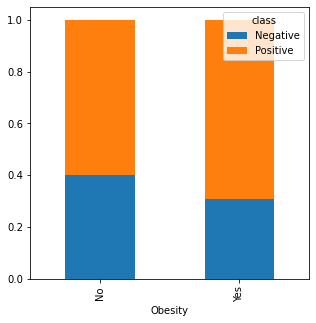

In [47]:
Obesity.div(Obesity.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True, figsize = (5,5))

The "Yes" in Obesity higher risk of being Positive for diabetes. However, the difference between "Yes" and "No" for Obesity is not high for Positive.

Lets analyse the relation between Age and Class 

In [48]:
df["Age"].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

Creating bins to understand the relation between Age and Class

In [49]:
bins = [15,30,50,70,90]
Group = ["16-30", "30-50", "50-70","70-90"]
df["Age_group"]= pd.cut(df["Age"], bins, labels=Group)

Age_group_bin = pd.crosstab(df["Age_group"], df["class"])
Age_group_bin

class,Negative,Positive
Age_group,,
16-30,30,15
30-50,97,171
50-70,66,127
70-90,7,7


<AxesSubplot:title={'center':'Relation between Age and Class'}, xlabel='Age_group'>

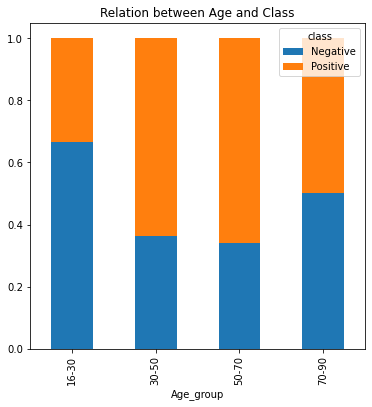

In [50]:
Age_group_bin.div(Age_group_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True, figsize = (6,6), title= "Relation between Age and Class")

It can be seen the proportion of positive cases is higher in Age groups of 30-50 and 50-70 years. 



In [51]:
#Lets build the model with numerical variable Age and drop Age-group column 
df.drop(["Age_group"], axis=1, inplace =True)

In [6]:
#Encoding categorical variables in the dataset. 

from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
#Lets separate the input and target variables 
target = df["class"]
df.drop(["class"], axis = 1, inplace = True)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [8]:
# Lets split the train and test data
from sklearn.model_selection import train_test_split
df_train, df_test, target_train, target_test = train_test_split(df, target, test_size=0.2, random_state=4)


In [9]:
#Lets print the shape of train and test datasets
df_train.shape

(416, 16)

In [10]:
df_test.shape

(104, 16)

In [15]:
#Importing sklearn metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score 
from sklearn.metrics import f1_score

In [12]:
#Building a Logistic Regression model 

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(df_train, target_train)
target_pred_lr = model.predict(df_test)
accuracy1 = accuracy_score(target_test, target_pred_lr)
print('Accuracy: %.2f' % (accuracy1*100))
print("Jaccard score: ", jaccard_score(target_test, target_pred_lr,average = "weighted"))
print("F1 score: ", f1_score(target_test, target_pred_lr,average = "weighted"))

Accuracy: 92.31
Jaccard score:  0.8581637717121589
F1 score:  0.923595894360512


In [13]:
#Building a SVM model 
from sklearn import preprocessing
from sklearn import svm


#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(df_train, target_train)
target_pred_svm= clf.predict(df_test)

accuracy2 = accuracy_score(target_test, target_pred_svm)
print('Accuracy: %.2f' % (accuracy2*100))
print("Jaccard score: ", jaccard_score(target_test, target_pred_svm,average = "weighted"))
print("F1 score: ", f1_score(target_test, target_pred_svm,average = "weighted"))

Accuracy: 48.08
Jaccard score:  0.31744071146245056
F1 score:  0.47011834319526624


[0.93269231 0.89423077 0.92307692 0.88461538 0.88461538 0.84615385
 0.82692308 0.81730769 0.80769231]


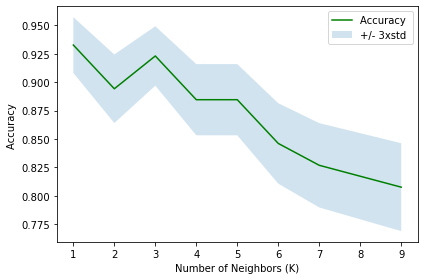

In [16]:
#Building a K-nearest neighbours model 

from sklearn.neighbors import KNeighborsClassifier
#Determining best k 
#Calculating the accuracy for different k's

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(df_train,target_train)
    target_pred_knn=neigh.predict(df_test)
    mean_acc[n-1] = metrics.accuracy_score(target_test, target_pred_knn)

    
    std_acc[n-1]=np.std(target_pred_knn==target_test)/np.sqrt(target_pred_knn.shape[0])

print(mean_acc)

#Plotting the accuracy scores for different k's
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.20)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [20]:
#Building a Random Forest classifier 

from numpy import mean 
from numpy import std

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

rdc = RandomForestClassifier()
rdc.fit(df_train, target_train)
target_pred_rdc = rdc.predict(df_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rdc, df_train, target_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy: 97.995 (0.020)
